In [1]:
from obspy.core import Stream, read, UTCDateTime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os 
import os.path

In [11]:
path_to_files = '/Users/sydneydybing/StrainProject/2024/'

earthquakes = pd.read_csv(path_to_files + 'M6_catalog_2004-2024.csv', dtype = str)
origin_times = earthquakes.time.values
mags = earthquakes.mag.values

bsm_mda = pd.read_csv(path_to_files + 'bsm_metadata.csv')
NA_only = bsm_mda.loc[bsm_mda['LONG'] < -110]
stas = NA_only['BNUM'].values

eqs_test = earthquakes[4:5]
ots_test = origin_times[4:5]
mags_test = mags[4:5]

In [17]:
print(earthquakes)

                        time    latitude     longitude   depth   mag magType  \
0   2023-04-13T15:54:53.808Z      49.215     -129.6178       7     6     mww   
1   2022-12-20T10:34:24.770Z      40.525      -124.423   17.91   6.4      mw   
2   2022-11-22T16:39:05.789Z     30.7936     -116.3907      10   6.2     mww   
3   2021-12-20T20:10:31.310Z  40.3901667      -124.298   27.04   6.2      mw   
4   2021-07-08T22:49:48.110Z     38.5075  -119.4998333    7.45     6      mw   
5   2020-05-15T11:03:27.176Z     38.1689     -117.8497     2.7   6.5      ml   
6   2020-03-31T23:52:30.781Z     44.4646     -115.1175   12.06   6.5     mww   
7   2019-12-25T03:36:01.626Z     50.6106      -129.963    6.58   6.3     mww   
8   2019-12-23T20:56:23.555Z     50.5169     -129.7573      10     6     mww   
9   2019-12-23T19:49:43.086Z     50.6071     -129.9372      10     6     mww   
10  2019-08-29T15:07:58.646Z     43.5425     -127.8817      10   6.3     mww   
11  2019-07-06T03:19:53.040Z     35.7695

Earthquake 1/35


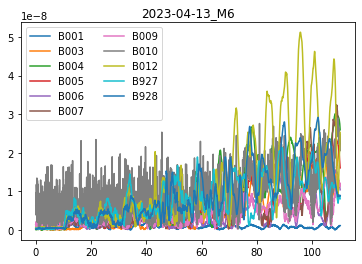

Earthquake 2/35


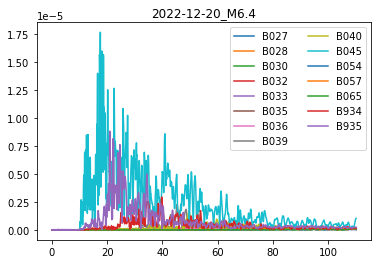

Earthquake 3/35


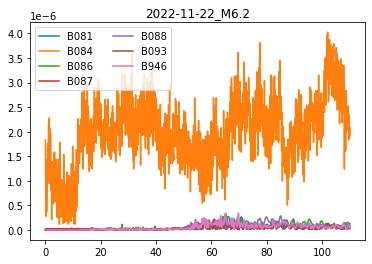

Earthquake 4/35


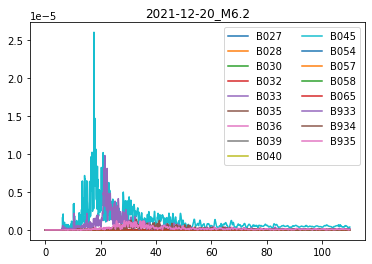

Earthquake 5/35


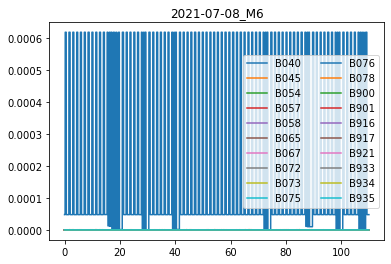

Earthquake 6/35


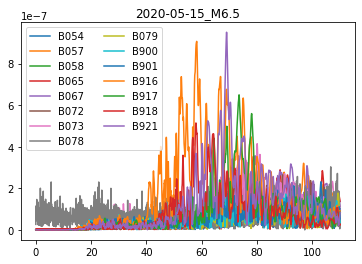

Earthquake 7/35


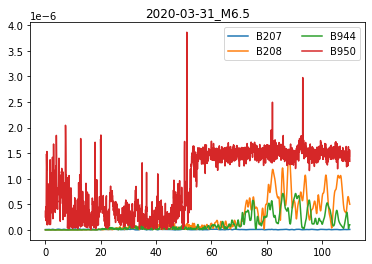

Earthquake 8/35


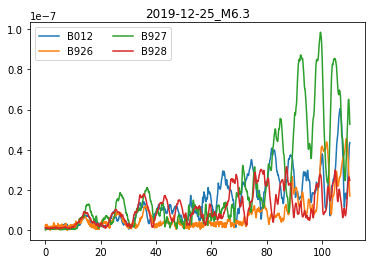

Earthquake 9/35


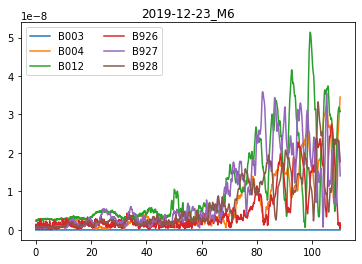

Earthquake 10/35


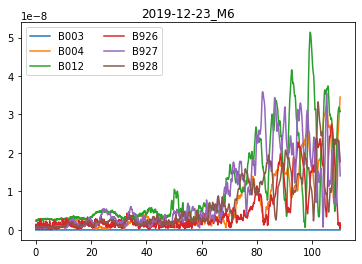

Earthquake 11/35


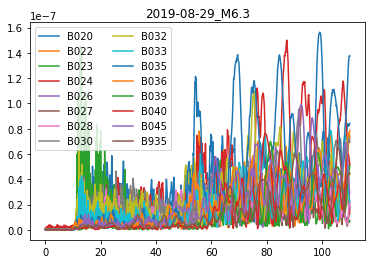

Earthquake 12/35


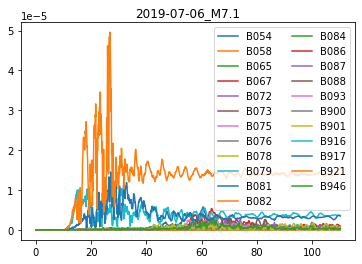

Earthquake 13/35


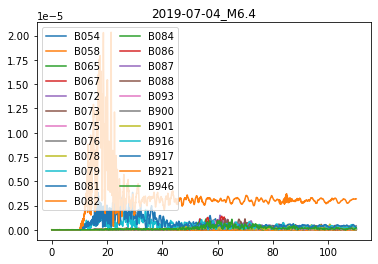

Earthquake 14/35


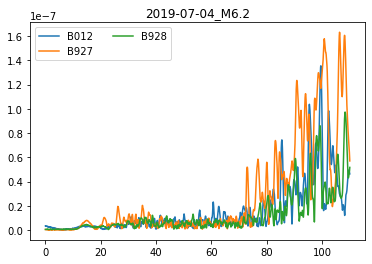

Earthquake 15/35


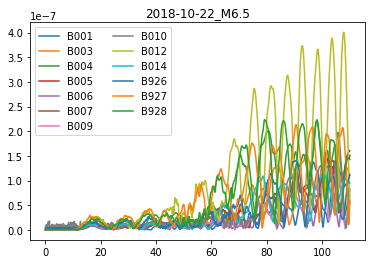

Earthquake 16/35


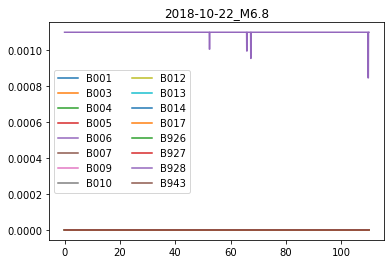

Earthquake 17/35


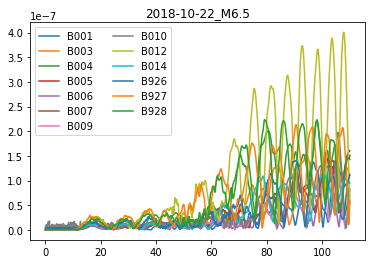

Earthquake 18/35


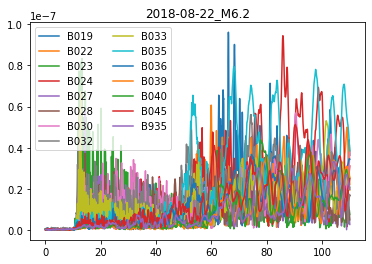

Earthquake 19/35


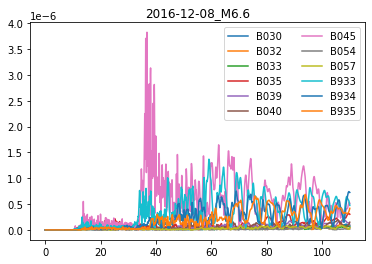

Earthquake 20/35


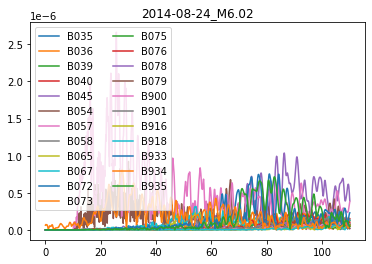

Earthquake 21/35


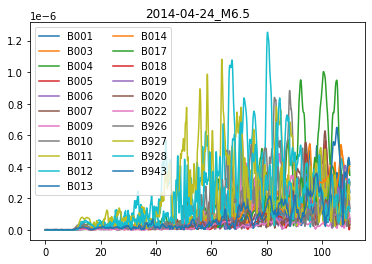

Earthquake 22/35


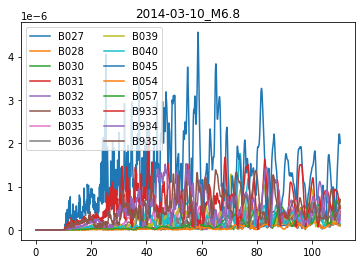

Earthquake 23/35


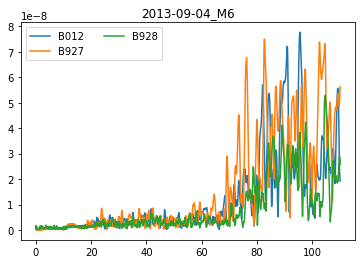

Earthquake 24/35


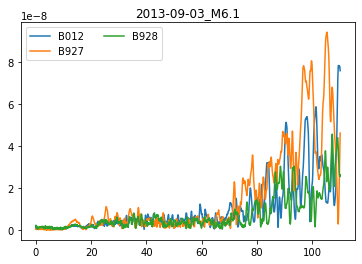

Earthquake 25/35


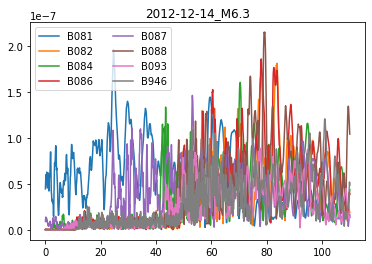

Earthquake 26/35


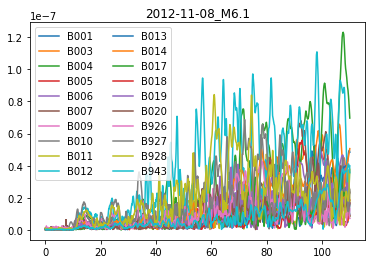

Earthquake 27/35


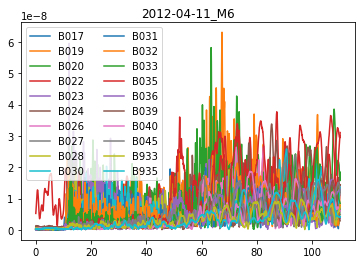

Earthquake 28/35


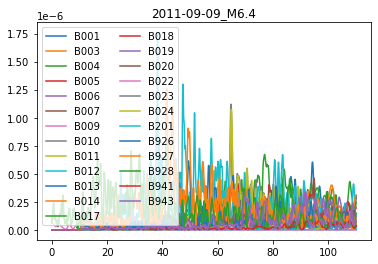

Earthquake 29/35


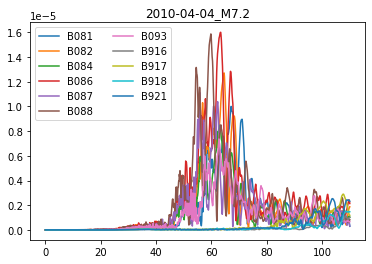

Earthquake 30/35


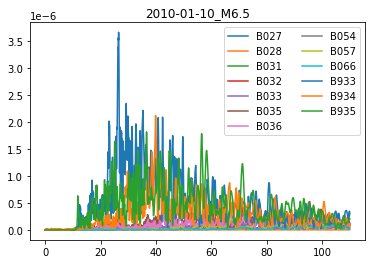

Earthquake 31/35


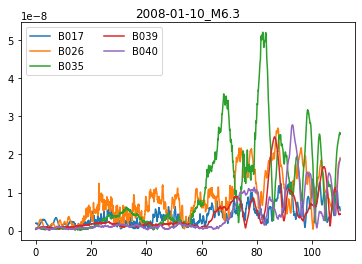

Earthquake 32/35


OSError: /Users/sydneydybing/StrainProject/2024/seismic_data/processed/2005-06-17_M6.6/picks not found.

In [16]:
for idx in range(len(earthquakes)):
    
    ot = origin_times[idx]
    print('Earthquake ' + str(idx+1) + '/' + str(len(mags)))
    
    pick_path = path_to_files + 'seismic_data/processed/' + str(ot[:10]) + '_M' + str(mags[idx]) + '/picks'
    pick_file = np.genfromtxt(pick_path, dtype = str)
    pick_file_stainfo = pick_file[:,3]
    
    pick_file_stas = []
    
    for idx2 in range(len(pick_file_stainfo)):
        
        pick_file_sta = pick_file_stainfo[idx2].split('.')[1]
        pick_file_stas.append(pick_file_sta)
        
    pick_file_stas = np.array(pick_file_stas)
    
    for sta in stas:
        
        try:
        
            i = np.where(pick_file_stas == sta)[0]
            pick_date = pick_file[i,0][0]
            pick_time = pick_file[i,1][0]
            pick_datetime = UTCDateTime(str(pick_date) + 'T' + str(pick_time) + 'Z')

            starttime = pick_datetime - 10 # 10 seconds before pick time
            endtime = starttime + 110 # full trace will be 2 minutes long

            RMS = read(path_to_files + 'strain_data/rms/' + str(ot[:10]) + '_M' + str(mags[idx]) + '/' + str(sta) + '.mseed')
    #         RMS.plot()

            RMS_trim = RMS.trim(starttime = starttime, endtime = endtime, pad = True, fill_value = 0)
    #         RMS_trim.plot()

            # Extracting just the RMS data, now trimmed properly, and saving it to a 
            # new miniSEED file.

            RMS_times_trim = RMS_trim[0].times()
            RMS_data_trim = RMS_trim[0].data
            RMS_trim[0].stats.channel = 'tBSR'

            plt.title(str(ot[:10]) + '_M' + str(mags[idx]))
            plt.plot(RMS_times_trim, RMS_data_trim, label = sta)
#             plt.legend()
#             plt.show()

            # Create folder for the event
            eq_sta_save_dir = path_to_files + 'strain_data/trimmed/' + str(ot[:10]) + '_M' + str(mags[idx]) + '/'
    #                 print(eq_sta_save_dir)
            if os.path.isdir(eq_sta_save_dir):
                pass
            else:
                os.makedirs(eq_sta_save_dir)

            RMS_trim.write(eq_sta_save_dir + sta + '.mseed', format = 'MSEED')
            
        except:
            pass
    
    plt.legend(ncol = 2)
    plt.show()  